## Setup

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.vision.gan import *
from fastai.utils.mem import *
from fastai.callbacks import *

import os
import torchvision
from torchvision.utils import save_image

from torchvision.models import vgg16_bn

In [4]:
import DAT259.setup as setup
import DAT259.wgan as wgan
import DAT259.superresgan as superres

In [5]:
path_mask = 'data/ISIC2018_Task1_Training_GroundTruth'
path_img = 'data/ISIC2018_Task1-2_Training_Input'

## Create testset

In [29]:
setup.create_testset(path_img, path_mask, 500)

## Generate masks

In [38]:
file_names = setup.choose_data(Path(path_mask), 100)

wgan.generate_masks(file_names, 100, path_mask, 1, bs=50) 

In [16]:
path_gen_masks = 'data/generated_mask_100'
wgan.image_cleaner(path_gen_masks)

## Pretraining

In [8]:
file_names = setup.get_data(Path('data/csv/csv_100'))
path_mask = Path(path_mask)
path_img = Path(path_img)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/sondre/.torch/models/vgg16_bn-6c64b313.pth
553507836it [00:25, 22028252.90it/s]


epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,5.425852,2347.407227,153.720856,5.427378,11.371861,0.520918,651.620972,1521.291992,3.453071,00:30


epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,756.678894,4.971895,1.196922,0.343097,0.436706,0.131887,1.081321,1.647233,0.134728,00:29


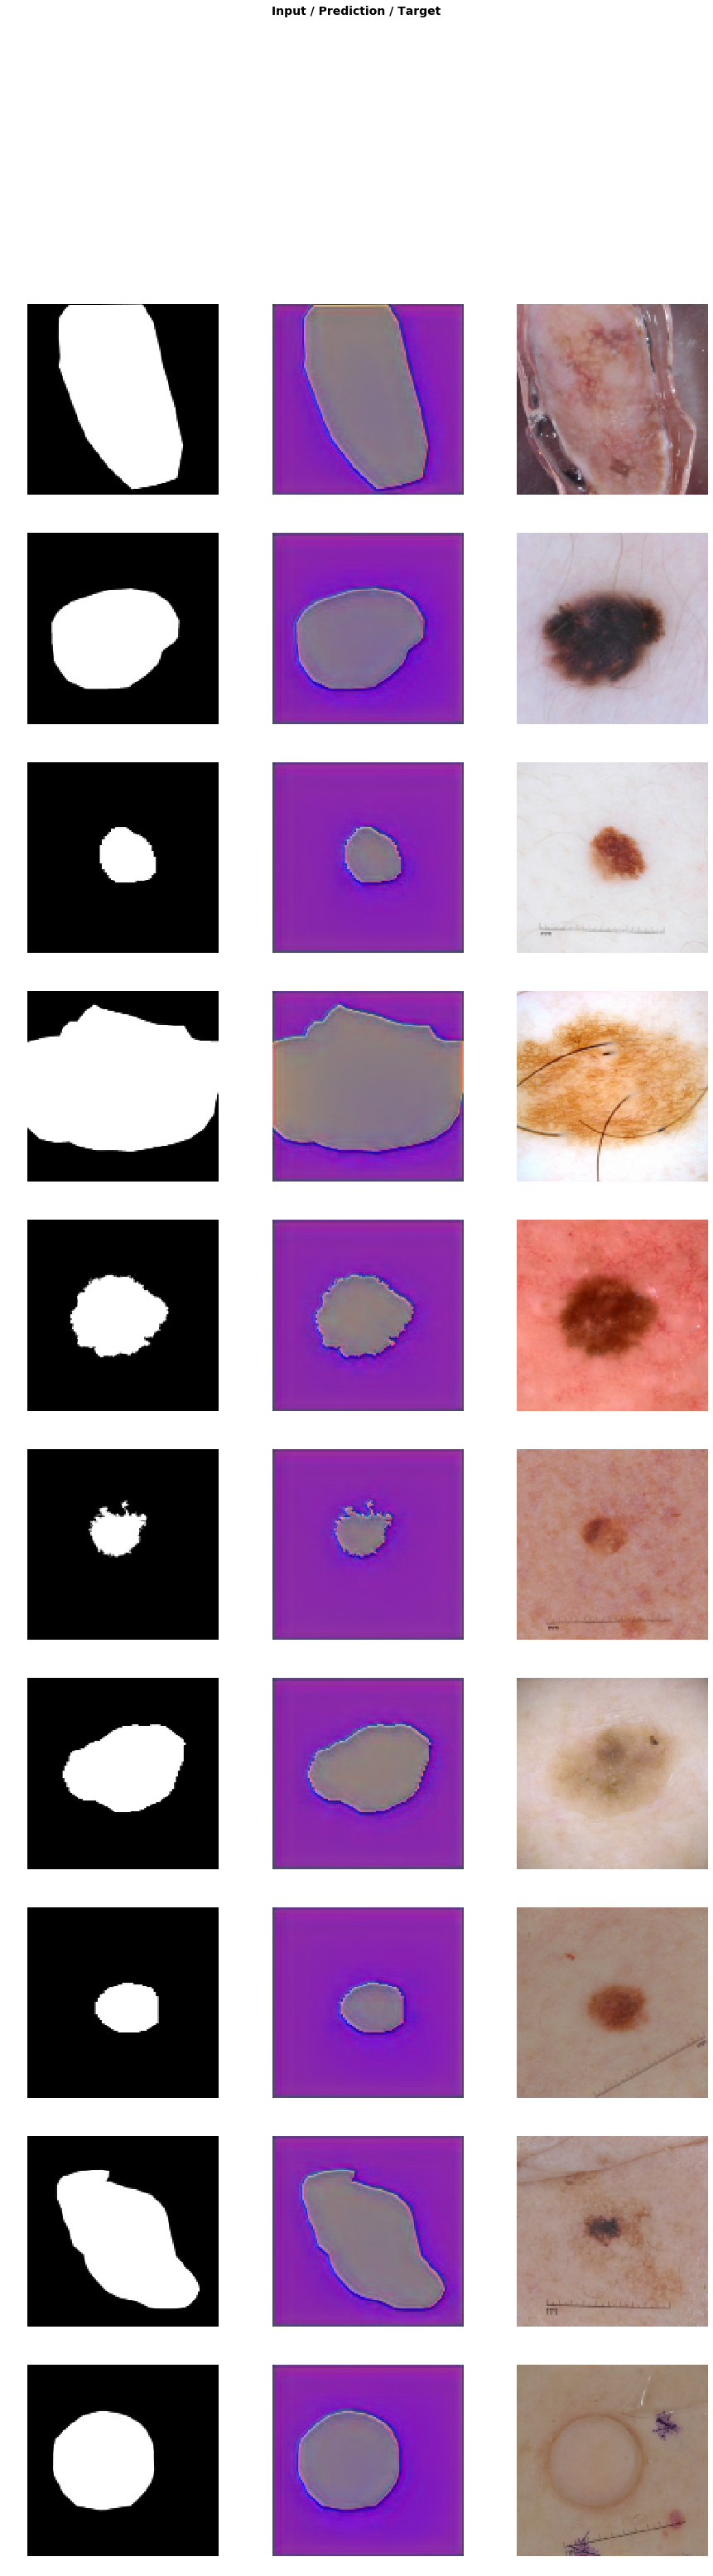

In [9]:
learn = superres.train_generator(file_names, path_mask, path_img, num_epochs=1)

In [ ]:
loss_critic = AdaptiveLoss(nn.BCEWithLogitsLoss())
superres.train_critic(100)